<a href="https://colab.research.google.com/github/charlie-aashutosh/charlie/blob/master/insurance_claim_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import files
files=files.upload()

Saving insurance2.csv to insurance2.csv


In [0]:
insurance=pd.read_csv("insurance2.csv")

In [5]:
insurance.head()

age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [7]:
#finding coorelation of every pair of features and outcomes associated 
corr=insurance.corr()
print(corr)

                     age       sex  ...   charges  insuranceclaim
age             1.000000 -0.020856  ...  0.299008        0.113723
sex            -0.020856  1.000000  ...  0.057292        0.031565
bmi             0.109272  0.046371  ...  0.198341        0.384198
children        0.042469  0.017163  ...  0.067998       -0.409526
smoker         -0.025019  0.076185  ...  0.787251        0.333261
region          0.002127  0.004588  ... -0.006208        0.020891
charges         0.299008  0.057292  ...  1.000000        0.309418
insuranceclaim  0.113723  0.031565  ...  0.309418        1.000000

[8 rows x 8 columns]


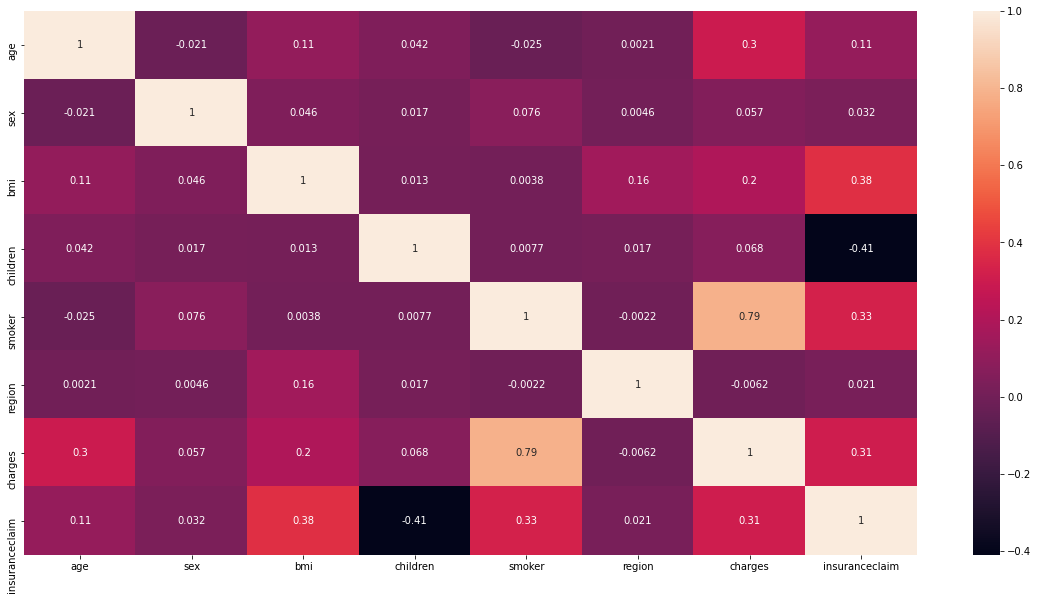

In [8]:
#visualizations using heatmap and jointplot
%matplotlib inline
plt.figure(figsize=(20,10))
snr.heatmap(insurance.corr(), annot=True)

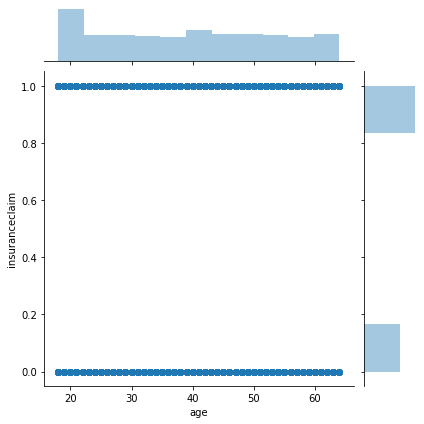

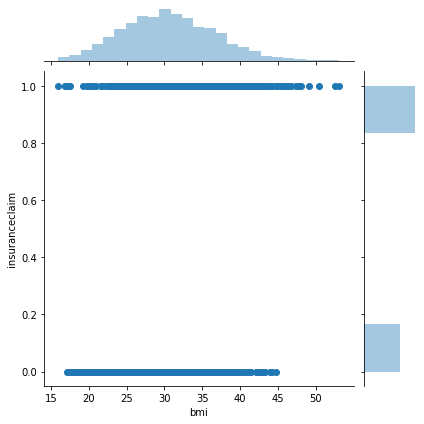

In [9]:
snr.jointplot(x=insurance['age'], y=insurance['insuranceclaim'])

snr.jointplot(x=insurance['bmi'], y=insurance['insuranceclaim'])

In [0]:
X=insurance[['age','sex','bmi','children','smoker','region','charges']]

y=insurance['insuranceclaim']

In [11]:
X.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [12]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [14]:
len(X_train)

936

In [15]:
len(y_test)

402

In [16]:
len(X_test)

402

In [0]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

In [19]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions=logmodel.predict(X_test)

In [21]:
from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.66      0.73       158\n           1       0.81      0.90      0.85       244\n\n    accuracy                           0.81       402\n   macro avg       0.81      0.78      0.79       402\nweighted avg       0.81      0.81      0.80       402\n'

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[105,  53],
       [ 25, 219]])

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.8059701492537313

In [25]:
import statsmodels.api as sm
#logisticregressionmodel
lrm1=sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
lrm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         insuranceclaim   No. Observations:                  936
Model:                            GLM   Df Residuals:                      928
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -341.35
Date:                Wed, 01 Apr 2020   Deviance:                       682.69
Time:                        12:59:49   Pearson chi2:                 3.95e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9166      0.713    -11.101      0.000      -9.314      -6.519
age            0.0347      0.009      3.973      0.000       0.018       0.052
sex            0.0348      0.191      0.182      0.856      -0.341       0.410
bmi            0.2632      0.022     11.925      0.000       0.220       0.306
children      -1.4723      0.117    -12.561      0.000      -1.702      -1.243
smoker         4.7101      0.530      8.892      0.000       3.672       5.748
region        -0.0040      0.088     -0.046      0.963      -0.176       0.168
charges    -9.066e-06   1.86e-05     -0.486      0.627   -4.56e-05    2.75e-05
==============================================================================
"""